# Loan Approval Prediction

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import seaborn as sns

In [2]:
data=pd.read_csv("~/Desktop/loan.csv") 
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,Female,Yes,1.0,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
496,LP002587,Male,Yes,0.0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y
497,LP002588,Male,Yes,0.0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y
498,LP002600,Male,Yes,1.0,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y


In [3]:
data.isnull().sum()

Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
dtype: int64

# Finding Coorelation Between Variables

In [4]:
corelation = data.corr()

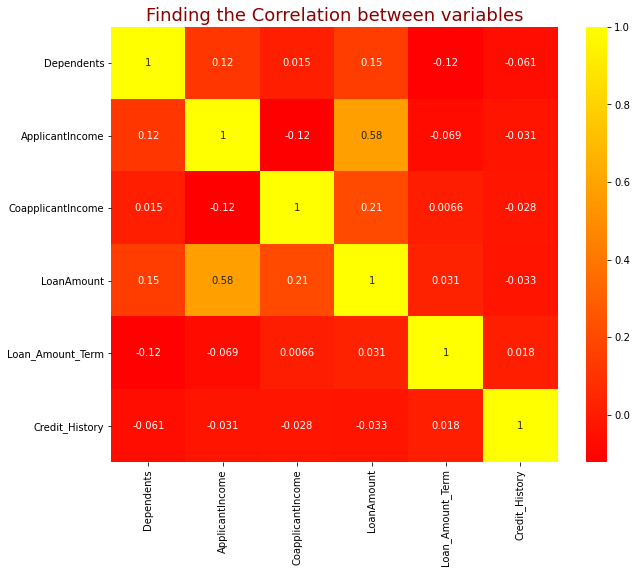

In [5]:
plt.figure(figsize=(10,8))
plt.title("Finding the Correlation between variables", fontsize = 18, color = 'darkred')
sns.heatmap(corelation,xticklabels= corelation.columns, yticklabels=corelation.columns,annot = True, cmap='autumn')

# Filling categorical missing values

In [6]:
data['Gender'].fillna(data['Gender'].value_counts().index[0],inplace=True)
data['Married'].fillna(data['Married'].value_counts().index[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].value_counts().index[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].value_counts().index[0],inplace=True)

In [7]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data = data.fillna(data.mean())

# Filling Numerical missing values

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,144.020747,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [11]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

0
Gender
1
Married
2
Dependents
3
Education
4
Self_Employed
5
Property_Area
6
Credit_History
7
Loan_Amount_Term


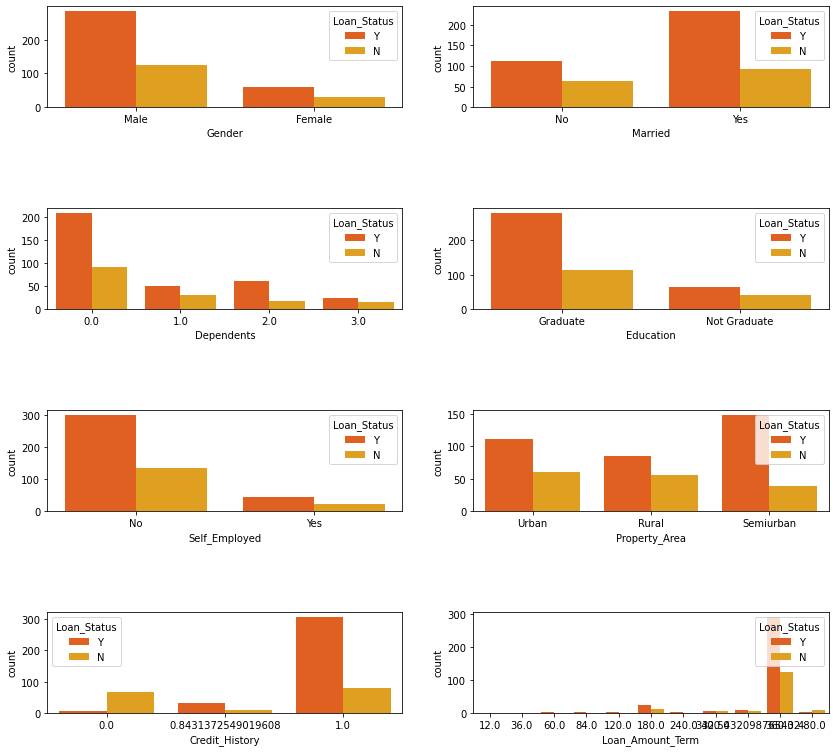

In [12]:
fig,axes = plt.subplots(4,2,figsize=(14,13))
for idx,cat_col in enumerate(categorical_columns):
    print(idx)
    print(cat_col)
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',palette = 'autumn', ax=axes[row,col])
plt.subplots_adjust(hspace=1)

# Statistical Analysis

In [13]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.718000,5493.644000,1506.307840,144.020747,342.543210,0.843137
std,1.000238,6515.668972,2134.432188,80.846099,62.933126,0.348791
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000
25%,0.000000,2874.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3854.000000,1125.500000,128.000000,360.000000,1.000000
75%,1.000000,5764.000000,2253.250000,160.000000,360.000000,1.000000
max,3.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000


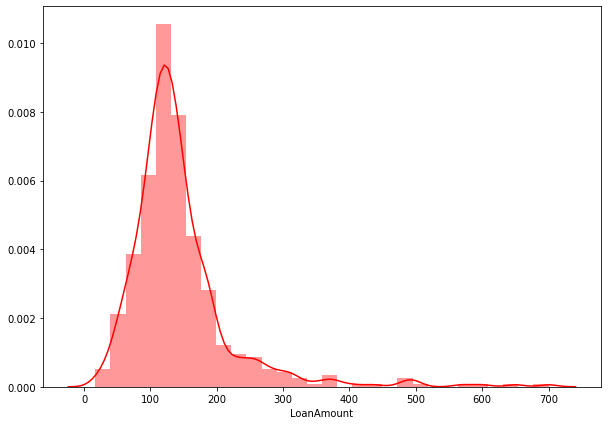

In [14]:
plt.figure(figsize=(10,7))
sns.distplot(data['LoanAmount'], bins = 30,  color = 'red')

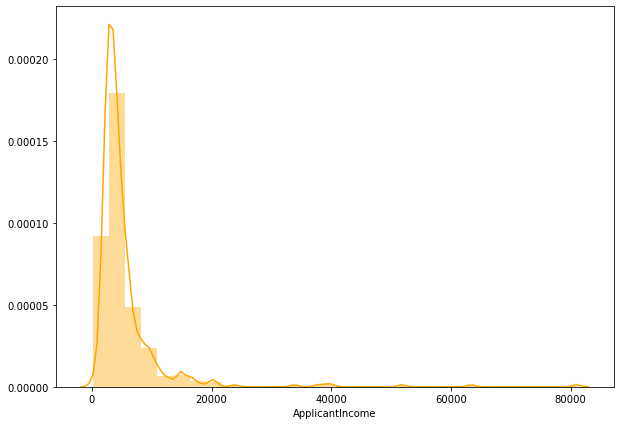

In [15]:
plt.figure(figsize=(10,7))
sns.distplot(data['ApplicantIncome'], bins = 30,  color = 'orange')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


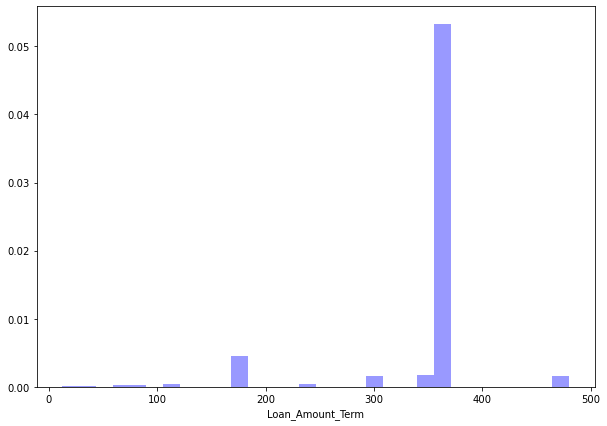

In [16]:
plt.figure(figsize=(10,7))
sns.distplot(data['Loan_Amount_Term'], bins = 30,  color = 'blue')

# Label Encoding 

In [17]:
data['Gender'] =data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes
data['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    1
497    1
498    1
499    1
Name: Gender, Length: 500, dtype: int8

In [18]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0.0,Graduate,No,5849,0.0,144.020747,360.0,1.000000,Urban,Y
1,LP001003,1,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,1,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,1,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,0,Yes,1.0,Graduate,No,3326,913.0,105.000000,84.0,1.000000,Semiurban,Y
496,LP002587,1,Yes,0.0,Not Graduate,No,2600,1700.0,107.000000,360.0,1.000000,Rural,Y
497,LP002588,1,Yes,0.0,Graduate,No,4625,2857.0,111.000000,12.0,0.843137,Urban,Y
498,LP002600,1,Yes,1.0,Graduate,Yes,2895,0.0,95.000000,360.0,1.000000,Semiurban,Y


In [19]:
data['Married'] =data['Married'].astype('category')
data['Married'] = data['Married'].cat.codes
data['Married']

0      0
1      1
2      1
3      1
4      0
      ..
495    1
496    1
497    1
498    1
499    0
Name: Married, Length: 500, dtype: int8

In [20]:
data['Education'] =data['Education'].astype('category')
data['Education'] = data['Education'].cat.codes
data['Education']

0      0
1      0
2      0
3      1
4      0
      ..
495    0
496    1
497    0
498    0
499    0
Name: Education, Length: 500, dtype: int8

In [21]:
data['Self_Employed'] =data['Self_Employed'].astype('category')
data['Self_Employed'] = data['Self_Employed'].cat.codes
data['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
495    0
496    0
497    0
498    1
499    0
Name: Self_Employed, Length: 500, dtype: int8

In [22]:
data['Property_Area'] =data['Property_Area'].astype('category')
data['Property_Area'] = data['Property_Area'].cat.codes
data['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
495    1
496    0
497    2
498    1
499    0
Name: Property_Area, Length: 500, dtype: int8

In [23]:
data['Loan_Status'] =data['Loan_Status'].astype('category')
data['Loan_Status'] = data['Loan_Status'].cat.codes
data['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    0
Name: Loan_Status, Length: 500, dtype: int8

In [24]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,144.020747,360.0,1.000000,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.000000,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.000000,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.000000,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,LP002586,0,1,1.0,0,0,3326,913.0,105.000000,84.0,1.000000,1,1
496,LP002587,1,1,0.0,1,0,2600,1700.0,107.000000,360.0,1.000000,0,1
497,LP002588,1,1,0.0,0,0,4625,2857.0,111.000000,12.0,0.843137,2,1
498,LP002600,1,1,1.0,0,1,2895,0.0,95.000000,360.0,1.000000,1,1


In [25]:
data = data.drop(columns=['Loan_ID']) 

In [26]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,144.020747,360.0,1.000000,2,1
1,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.000000,0,0
2,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.000000,2,1
3,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.000000,2,1
4,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,1,1.0,0,0,3326,913.0,105.000000,84.0,1.000000,1,1
496,1,1,0.0,1,0,2600,1700.0,107.000000,360.0,1.000000,0,1
497,1,1,0.0,0,0,4625,2857.0,111.000000,12.0,0.843137,2,1
498,1,1,1.0,0,1,2895,0.0,95.000000,360.0,1.000000,1,1


# Building Model

In [27]:
X=data.drop('Loan_Status', axis =1)
y=data['Loan_Status']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
90,1,1,0.0,0,0,2958,2900.0,131.0,360.0,1.000000,1
254,1,0,0.0,0,1,16250,0.0,192.0,360.0,0.000000,2
283,0,0,0.0,0,0,1811,1666.0,54.0,360.0,1.000000,2
445,1,1,1.0,0,1,3466,1210.0,130.0,360.0,1.000000,0
461,1,1,3.0,0,0,7740,0.0,128.0,180.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.000000,2
318,0,0,1.0,0,0,3541,0.0,112.0,360.0,0.843137,1
331,1,0,0.0,0,0,2935,0.0,98.0,360.0,1.000000,1
245,1,0,0.0,0,1,6050,4333.0,120.0,180.0,1.000000,2


# Model Evaluation 

In [33]:
prediction = model.predict(X_test)
print(prediction)

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1]


In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.46      0.59        39
           1       0.84      0.96      0.90       111

    accuracy                           0.83       150
   macro avg       0.83      0.71      0.74       150
weighted avg       0.83      0.83      0.82       150



In [35]:
model.predict_proba(X_test)

array([[0.14827992, 0.85172008],
       [0.85958146, 0.14041854],
       [0.25179688, 0.74820312],
       [0.17784277, 0.82215723],
       [0.13137455, 0.86862545],
       [0.23508225, 0.76491775],
       [0.2068703 , 0.7931297 ],
       [0.19667738, 0.80332262],
       [0.2489087 , 0.7510913 ],
       [0.29548329, 0.70451671],
       [0.14586157, 0.85413843],
       [0.8672969 , 0.1327031 ],
       [0.46188763, 0.53811237],
       [0.28692539, 0.71307461],
       [0.75495384, 0.24504616],
       [0.25808133, 0.74191867],
       [0.38001254, 0.61998746],
       [0.16373869, 0.83626131],
       [0.1768446 , 0.8231554 ],
       [0.21076414, 0.78923586],
       [0.42291737, 0.57708263],
       [0.31735478, 0.68264522],
       [0.21683731, 0.78316269],
       [0.8745272 , 0.1254728 ],
       [0.26162577, 0.73837423],
       [0.86233161, 0.13766839],
       [0.3628806 , 0.6371194 ],
       [0.81592838, 0.18407162],
       [0.2087745 , 0.7912255 ],
       [0.48805574, 0.51194426],
       [0.

In [36]:
model.score(X_test,y_test)

0.8333333333333334

In [37]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, model.predict(X_test))
print(confusion)

[[ 18  21]
 [  4 107]]


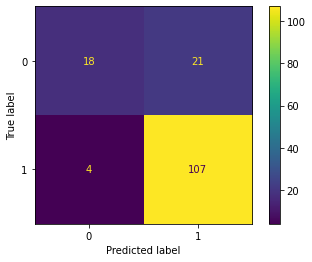

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [39]:
model.coef_

array([[ 3.91431325e-01,  6.58856896e-01, -2.54914669e-01,
        -4.98285168e-01,  2.22701240e-03,  8.18807047e-06,
        -1.54495884e-05, -4.95903651e-03, -4.48303495e-03,
         2.75414771e+00, -3.35014489e-04]])

In [40]:
model.intercept_

array([0.22816505])

In [41]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [42]:
def prediction_function(Gender):
    z = 3.914 * Gender - 0.228 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y 

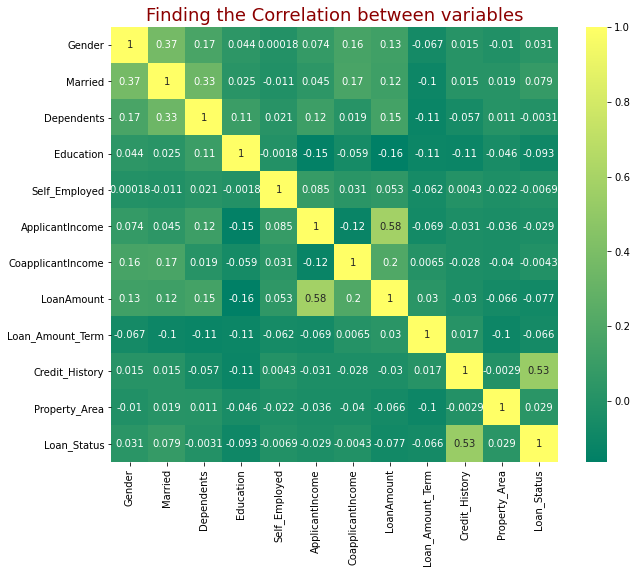

In [43]:
corelation = data.corr()
plt.figure(figsize=(10,8))
plt.title("Finding the Correlation between variables", fontsize = 18, color = 'darkred')
sns.heatmap(corelation,xticklabels= corelation.columns, yticklabels=corelation.columns,annot = True, cmap='summer')

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
rfprediction = model.predict(X_test)
print(rfprediction)
print(classification_report(y_test, rfprediction))

[1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1]
              precision    recall  f1-score   support

           0       0.82      0.46      0.59        39
           1       0.84      0.96      0.90       111

    accuracy                           0.83       150
   macro avg       0.83      0.71      0.74       150
weighted avg       0.83      0.83      0.82       150



# Decision Tree

In [45]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)
dtpredictions = model.predict(X_test)
print(dtpredictions)
print(classification_report(y_test, dtpredictions))

[1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1
 1 0]
              precision    recall  f1-score   support

           0       0.41      0.54      0.47        39
           1       0.82      0.73      0.77       111

    accuracy                           0.68       150
   macro avg       0.61      0.63      0.62       150
weighted avg       0.71      0.68      0.69       150

